# Homework 2
### Neil Kanungo

Question - Use the Titanic.csv file that is in the Files section and perform data cleaning, data transformation and plotting and use gender, age, sibsp, parch and embarked features to predict survived. Make sure to convert gender and embarked which are categorical features into numerical. Build the following models. For each model, compute the recall, precision, accuracy, classification report, confusion matrix. At the end make a conclusion on which model is best for this dataset.

a) a logistic regression

b) a decision tree

c) a Random forest

# Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.shape

(891, 12)

# Visualize Data

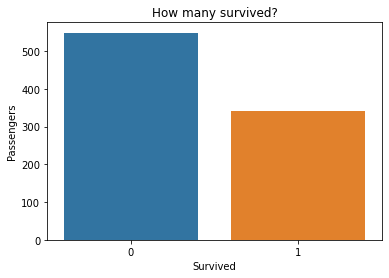

In [5]:
sns.countplot(x="Survived",data=df)
plt.ylabel("Passengers")
plt.title("How many survived?")
plt.show()

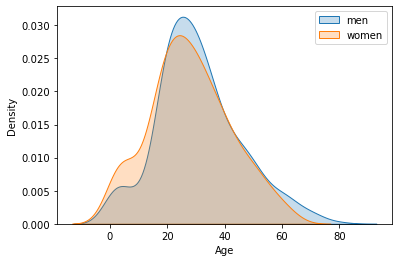

In [6]:
men = df[df['Gender']=='male']['Age']
women = df[df['Gender']=='female']['Age']

sns.kdeplot(men,shade=True)
sns.kdeplot(women,shade=True)
plt.legend(labels=['men','women'])

<AxesSubplot:xlabel='Gender', ylabel='Age'>

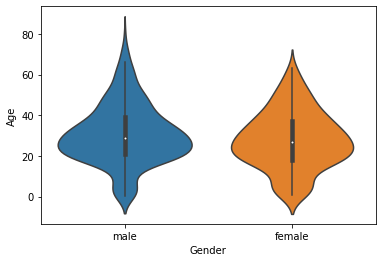

In [7]:
sns.violinplot(data=df, x='Gender',y='Age')

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

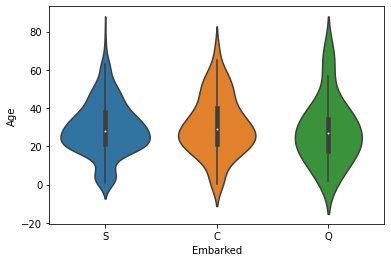

In [8]:
sns.violinplot(data=df, x='Embarked',y='Age')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

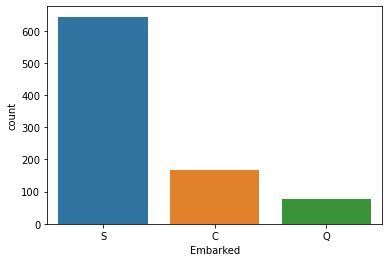

In [9]:
sns.countplot(x="Embarked",data = df)

<AxesSubplot:xlabel='Parch', ylabel='count'>

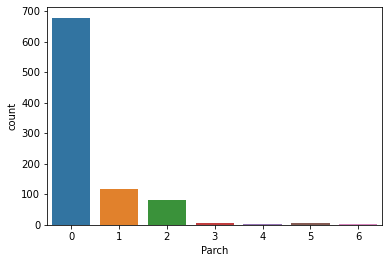

In [10]:
sns.countplot(x="Parch",data=df)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

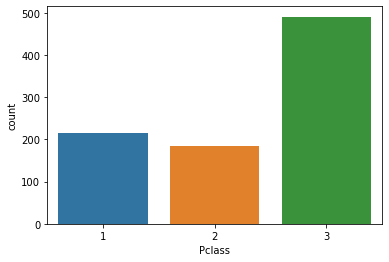

In [11]:
sns.countplot(x="Pclass",data=df)

# Data Transformation

In [12]:
df.Gender.unique()

array(['male', 'female'], dtype=object)

In [13]:
df.Gender[df.Gender == "male"] = 1
df.Gender[df.Gender == "female"] = 0

C:\Users\nkanungo\AppData\Local\Temp\ipykernel_24496\2775229386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender == "male"] = 1
C:\Users\nkanungo\AppData\Local\Temp\ipykernel_24496\2775229386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Gender[df.Gender == "female"] = 0


In [14]:
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [15]:
df.Embarked[df.Embarked == "S"] = 1
df.Embarked[df.Embarked == "C"] = 2
df.Embarked[df.Embarked == "Q"] = 3

C:\Users\nkanungo\AppData\Local\Temp\ipykernel_24496\3078613111.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked == "S"] = 1
C:\Users\nkanungo\AppData\Local\Temp\ipykernel_24496\3078613111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Embarked == "C"] = 2
C:\Users\nkanungo\AppData\Local\Temp\ipykernel_24496\3078613111.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Embarked[df.Emba

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
df = df[['Gender','Age','SibSp','Parch','Embarked','Survived']]

In [18]:
df = df.dropna()
df.describe()

,Age,SibSp,Parch,Survived
count,712.000000,712.000000,712.000000,712.000000
mean,29.642093,0.514045,0.432584,0.404494
std,14.492933,0.930692,0.854181,0.491139
min,0.420000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,0.000000,0.000000
75%,38.000000,1.000000,1.000000,1.000000
max,80.000000,5.000000,6.000000,1.000000


# Modeling Section

In [19]:
# Set predictors and target vars
x = df[['Gender','Age','SibSp','Parch','Embarked']]
y = df['Survived']

## Logistic Regression

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x_train)
train_sc = scaler.transform(x_train) 
test_sc = scaler.transform(x_test)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1, solver='lbfgs')
model.fit(train_sc, y_train)
ypred = model.predict(test_sc)
ypred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

Classification Report:
++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.74      0.85      0.79        80
           1       0.76      0.62      0.68        63

    accuracy                           0.75       143
   macro avg       0.75      0.73      0.74       143
weighted avg       0.75      0.75      0.74       143

Confusion Matrix:
+++++++++++++++++
[[68 12]
 [24 39]]


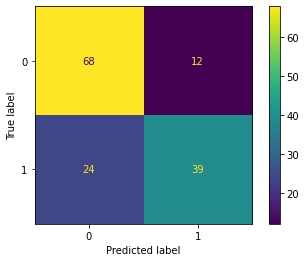

Logistic Regression accuracy is: 74.82517482517483


In [21]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cm_log = confusion_matrix(y_test, ypred)
print("Classification Report:")
print("++++++++++++++++++++++")
print(classification_report(y_test, ypred))
print("Confusion Matrix:")
print("+++++++++++++++++")
print(cm_log)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=model.classes_) 
disp.plot()
plt.show()

from sklearn.metrics import accuracy_score
Log_Accuracy = (accuracy_score(y_test, ypred))*100
print("Logistic Regression accuracy is:",Log_Accuracy)

## Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

xdr_train, xdr_test, ydr_train, ydr_test = train_test_split(x, y, test_size=0.2, random_state=2)

dtree = DecisionTreeClassifier()
dtree.fit(xdr_train,ydr_train) 

predict=dtree.predict(xdr_test) # predicted y from the x test                              
predict

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

Classification Report:
++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        89
           1       0.64      0.69      0.66        54

    accuracy                           0.73       143
   macro avg       0.72      0.72      0.72       143
weighted avg       0.74      0.73      0.74       143

Confusion Matrix:
+++++++++++++++++
[[68 21]
 [17 37]]


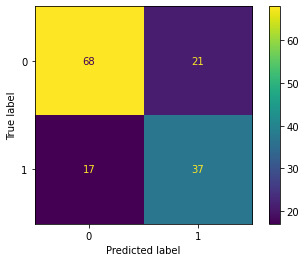

Decision Tree accuracy is: 73.42657342657343


In [23]:
print("Classification Report:")
print("++++++++++++++++++++++")
print(classification_report(ydr_test, predict))

print("Confusion Matrix:")
print("+++++++++++++++++")
cm_tree = confusion_matrix(ydr_test,predict )
print(cm_tree)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_tree, display_labels=model.classes_) 
disp.plot()
plt.show()

DT_Accuracy = accuracy_score(ydr_test, predict)*100
print("Decision Tree accuracy is:", DT_Accuracy) 

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(xdr_train, ydr_train)
rfc_predict = rfc.predict(xdr_test) 

rfc_predict

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

Classification Report:
++++++++++++++++++++++
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        89
           1       0.60      0.69      0.64        54

    accuracy                           0.71       143
   macro avg       0.69      0.70      0.70       143
weighted avg       0.72      0.71      0.71       143

Confusion Matrix:
+++++++++++++++++
[[64 25]
 [17 37]]


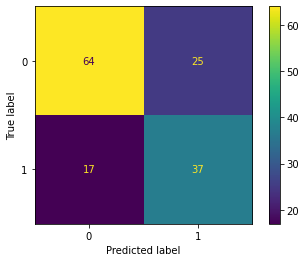

Random Forest accuracy is: 70.62937062937063


In [25]:
print("Classification Report:")
print("++++++++++++++++++++++")
print(classification_report(ydr_test, rfc_predict))

print("Confusion Matrix:")
print("+++++++++++++++++")
cm_rf = confusion_matrix(ydr_test,rfc_predict )
print(cm_rf)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=model.classes_) 
disp.plot()
plt.show()

RF_Accuracy = accuracy_score(ydr_test,rfc_predict)*100
print("Random Forest accuracy is:", RF_Accuracy)

# Conclusion

In [27]:
print("Logistic Regression Accuracy:",Log_Accuracy)
print("Decision Tree Accuracy:",DT_Accuracy)
print("Random Forest Accuracy:",RF_Accuracy)

Logistic Regression Accuracy: 74.82517482517483
Decision Tree Accuracy: 73.42657342657343
Random Forest Accuracy: 70.62937062937063


In [28]:
print("Conclusion: Logistic Regression has the best accuracy and is the chosen best model")

Conclusion: Logistic Regression has the best accuracy and is the chosen best model
